# Objective
1. load data
2. analyze data
3. predict income (>50k or <=50k)

# load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#read data from : https://www.kaggle.com/uciml/adult-census-income
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Analyze data

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.00,3.26e+04,32561.00,32561.00,32561.00,32561.00
mean,38.58,1.90e+05,10.08,1077.65,87.30,40.44
std,13.64,1.06e+05,2.57,7385.29,402.96,12.35
min,17.00,1.23e+04,1.00,0.00,0.00,1.00
25%,28.00,1.18e+05,9.00,0.00,0.00,40.00
50%,37.00,1.78e+05,10.00,0.00,0.00,40.00
75%,48.00,2.37e+05,12.00,0.00,0.00,45.00
max,90.00,1.48e+06,16.00,99999.00,4356.00,99.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#find all unique catagorical data
obj=[]
for i in list(df.columns):
  if df[i].dtype == 'O':
    obj.append(i)
    print(i+ ': '+ str(df[i].unique()) +'\n' )

workclass: ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

education: ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

marital.status: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation: ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

race: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

sex: ['Female' 'Male']

native.country: ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Tri

# Handling missing data

In [ ]:
#remove ?
df_no_unknown=df[df !='?'].dropna()
df_no_unknown.shape

(30162, 15)

In [ ]:
# ? check 
for i in list(df_no_unknown.columns):
  if df_no_unknown[i].dtype == 'O':
    print(i+ ': '+ str(df_no_unknown[i].unique()) +'\n' )

workclass: ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay']

education: ['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-voc' '1st-4th' '5th-6th' 'Assoc-acdm'
 '12th' '9th' 'Preschool']

marital.status: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation: ['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Transport-moving' 'Sales' 'Craft-repair'
 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Handlers-cleaners'
 'Armed-Forces' 'Priv-house-serv']

relationship: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

race: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

sex: ['Female' 'Male']

native.country: ['United-States' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'Sou

# Distribution plot

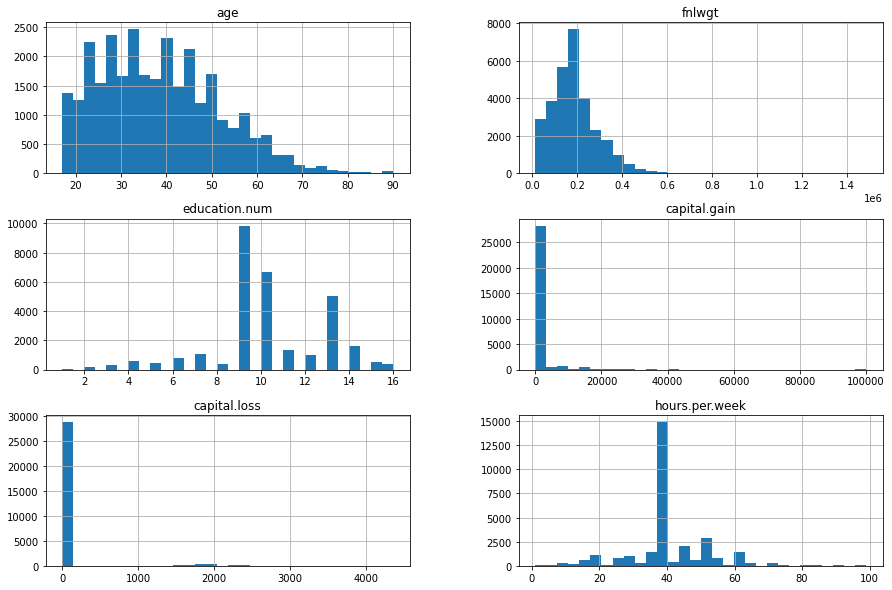

In [ ]:
#distribution plot of all numeric data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
df_no_unknown.hist(bins=30,figsize=(15,10),grid=True);

In [ ]:
#no of catagorical data
len(obj)

9

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

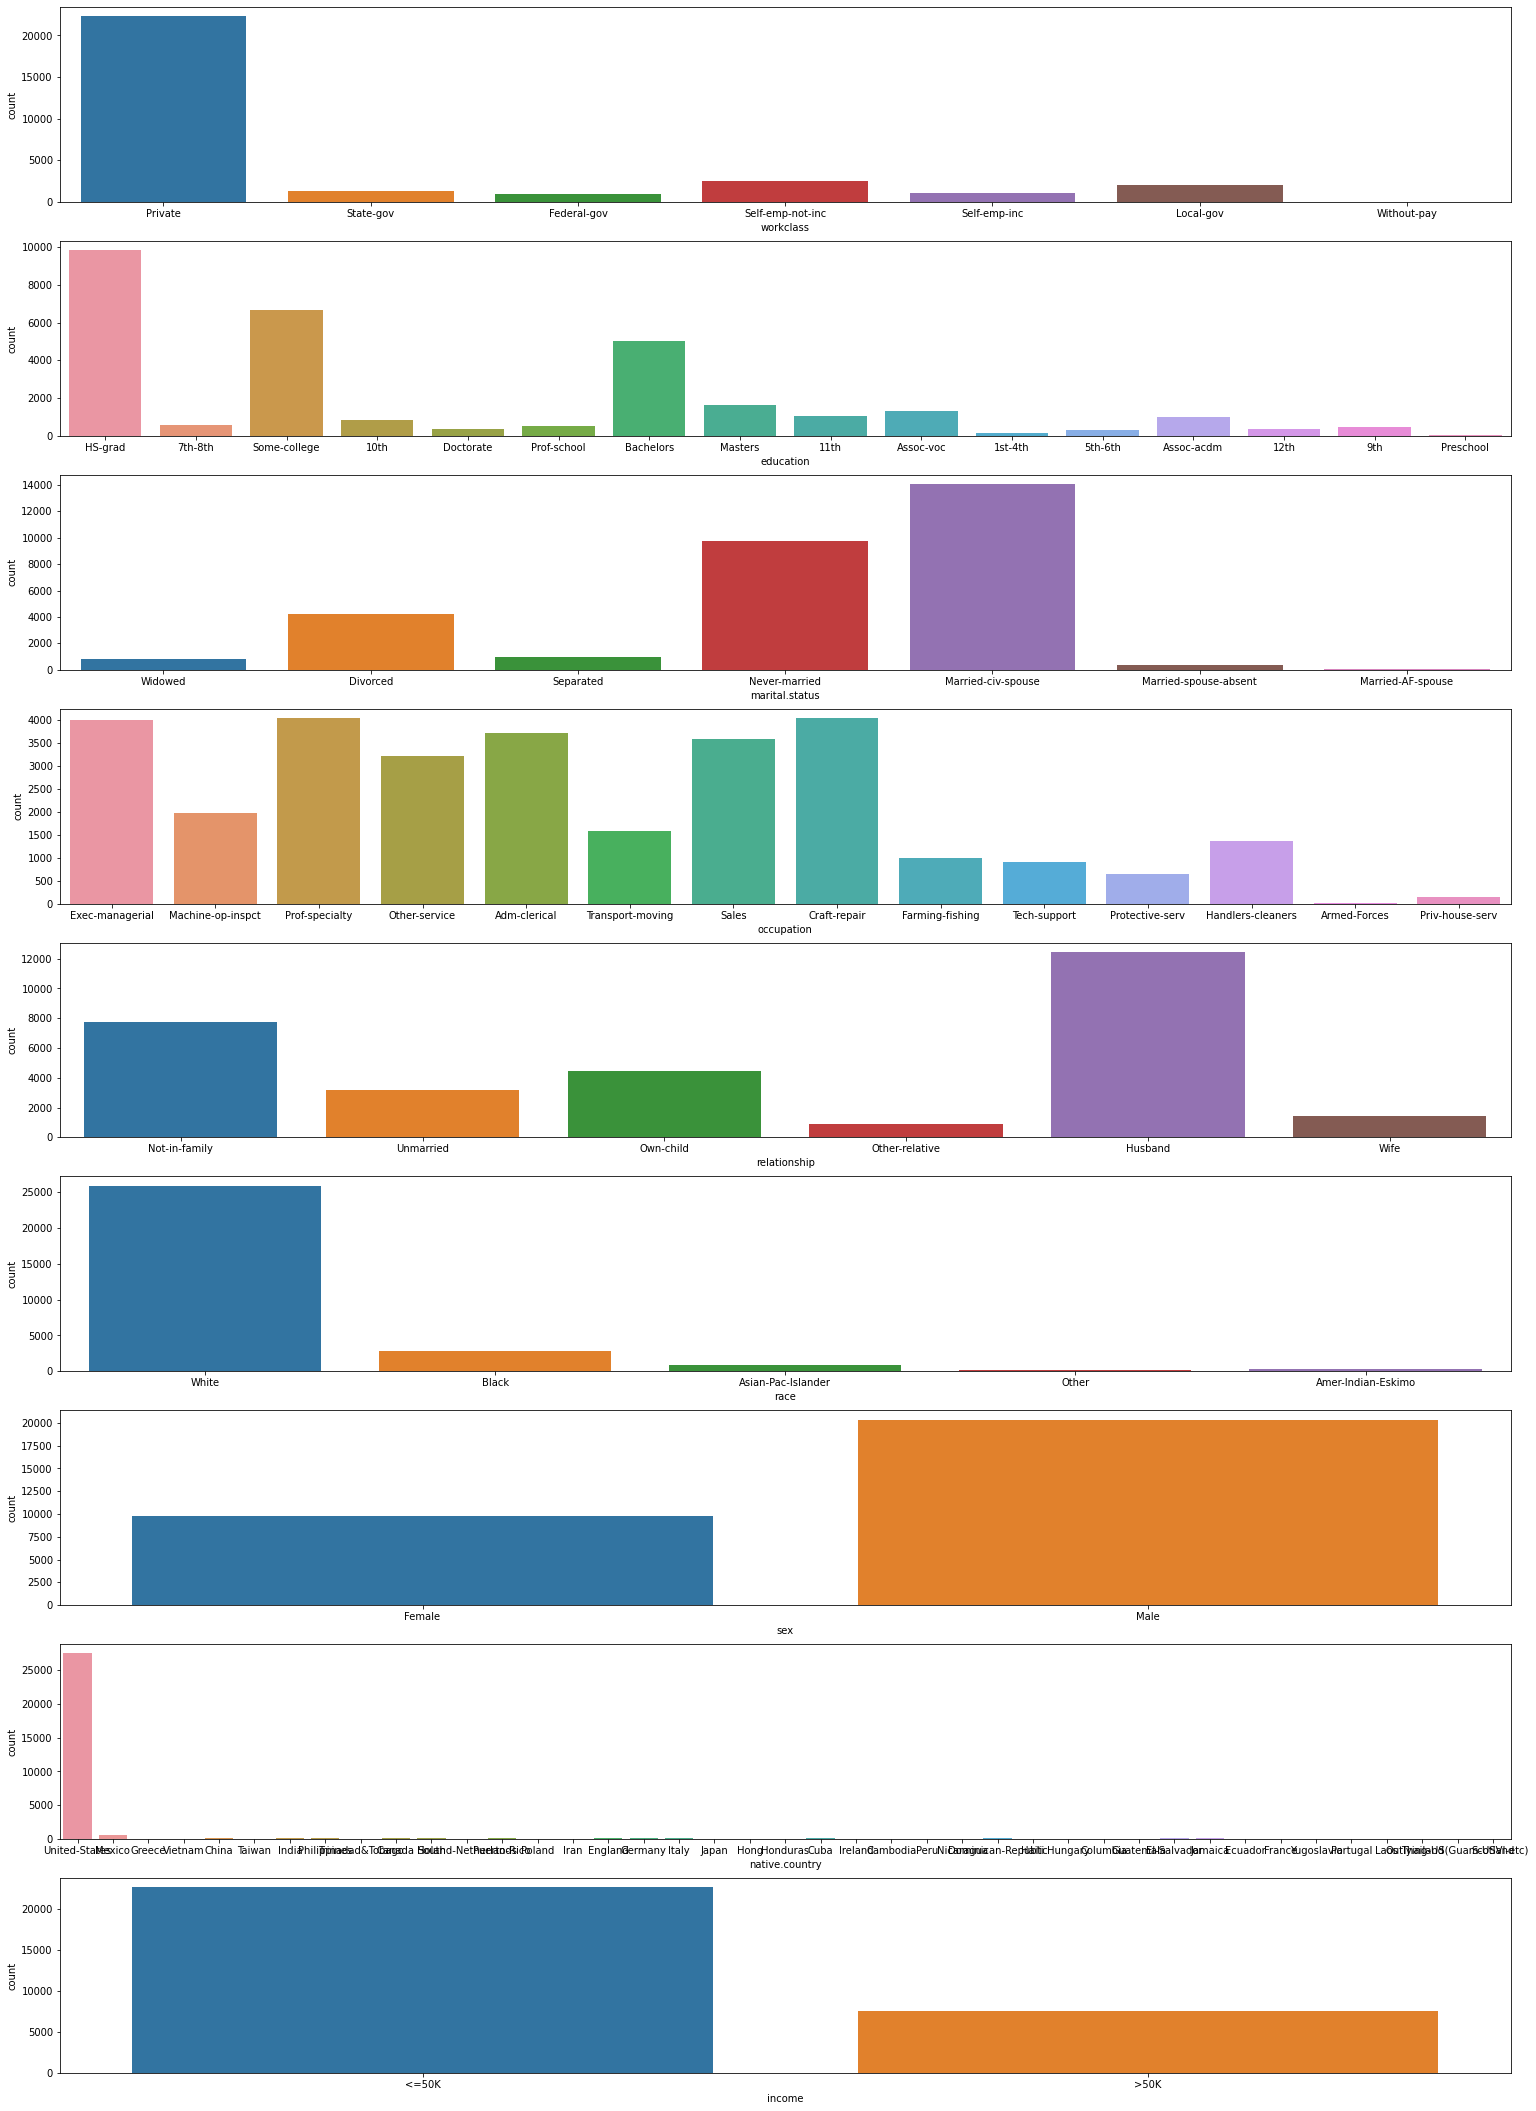

In [ ]:
#distribution of catagorical variables
plt.figure(figsize=(26,38))
for i in range(len(obj)):
  plt.subplot(9, 1, i+1)
  sns.countplot(df_no_unknown[obj[i]])

In [ ]:
#some lebals in x-axis is not display well

# Handling catagorical data

In [ ]:
#catagorical data to numerical data using dummies

for i in range(len(obj)):
  dummy1=pd.get_dummies(df_no_unknown[obj[i]], prefix=obj[i])
  df_no_unknown= pd.concat([df_no_unknown, dummy1], axis = 1)
  df_no_unknown.drop([obj[i]], axis = 'columns', inplace=True) 

In [ ]:
df_no_unknown.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
1,82,132870,9,0,4356,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,54,140359,4,0,3900,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,41,264663,10,0,3900,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,34,216864,9,0,3770,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,38,150601,6,0,3770,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


# Correlation plot

In [ ]:
# correlation
from pandas import set_option
set_option('precision', 2)
df_no_unknown.corr(method='pearson')

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
age,1.00e+00,-7.65e-02,4.35e-02,8.02e-02,6.02e-02,1.02e-01,5.66e-02,6.83e-02,-2.10e-01,1.11e-01,1.50e-01,1.48e-02,1.53e-02,-6.88e-03,-8.77e-02,-5.50e-02,3.34e-02,2.40e-02,9.60e-02,1.76e-02,-1.63e-02,-3.10e-03,6.95e-03,7.43e-02,1.08e-02,9.64e-02,8.39e-03,5.98e-02,-9.35e-02,1.36e-01,-1.56e-02,3.08e-01,1.58e-02,-5.24e-01,1.31e-02,2.47e-01,-4.09e-02,-1.08e-02,1.61e-02,0.11,...,2.96e-03,2.99e-02,-3.61e-03,-4.54e-03,-1.63e-02,1.15e-02,3.31e-03,6.25e-03,1.83e-02,-2.10e-02,3.12e-04,-2.82e-03,-6.23e-03,-9.89e-03,1.73e-02,-1.53e-03,3.97e-03,-4.25e-03,2.91e-02,-1.04e-02,1.27e-03,-5.05e-03,-5.75e-02,-1.39e-02,4.53e-04,-6.18e-03,7.94e-03,1.06e-02,1.06e-03,7.84e-03,2.42e-05,1.92e-03,-7.88e-03,-4.94e-03,7.87e-03,0.02,-1.78e-02,6.57e-04,-2.42e-01,2.42e-01
fnlwgt,-7.65e-02,1.00e+00,-4.50e-02,4.22e-04,-9.75e-03,-2.29e-02,-6.93e-03,-3.52e-03,4.66e-02,-2.55e-02,-4.15e-02,-1.07e-02,-3.17e-03,1.14e-02,6.24e-03,1.13e-02,3.72e-02,4.28e-02,1.45e-03,1.72e-02,5.32e-03,-1.74e-02,-7.89e-03,-1.07e-03,-2.70e-03,-2.22e-02,1.75e-02,-5.34e-03,-3.30e-03,-1.58e-02,-9.08e-04,-2.92e-02,4.88e-03,3.86e-02,3.00e-02,-2.29e-02,7.66e-03,4.19e-03,9.31e-03,-0.02,...,1.56e-02,3.05e-02,1.49e-03,-9.24e-04,3.51e-02,-3.29e-03,1.58e-03,6.73e-04,-1.36e-02,3.31e-02,6.88e-03,-8.82e-03,1.16e-02,7.79e-03,-1.83e-03,-1.16e-02,-2.93e-03,-1.38e-02,-3.06e-03,1.18e-02,9.05e-05,6.13e-03,1.37e-01,3.30e-02,3.00e-03,2.61e-02,-1.90e-02,-2.25e-03,-1.40e-02,7.12e-03,-3.05e-03,-1.06e-02,1.61e-03,-1.24e-03,-4.13e-04,-0.08,-1.08e-02,5.71e-03,8.96e-03,-8.96e-03
education.num,4.35e-02,-4.50e-02,1.00e+00,1.24e-01,7.96e-02,1.53e-01,5.82e-02,9.74e-02,-1.65e-01,7.88e-02,1.06e-02,1.01e-01,-8.87e-03,-2.70e-01,-2.32e-01,-9.36e-02,-2.26e-01,-2.74e-01,-3.29e-01,-2.49e-01,1.37e-01,7.33e-02,5.06e-01,2.59e-01,-3.06e-01,3.63e-01,-1.38e-01,2.59e-01,-2.54e-02,-7.47e-03,2.23e-04,8.07e-02,-4.06e-02,-3.01e-02,-5.18e-02,-6.20e-02,-1.95e-03,-6.91e-05,-1.55e-01,0.20,...,-1.14e-02,-9.23e-03,-5.61e-02,-6.64e-03,-7.33e-02,2.11e-02,2.64e-02,2.53e-02,-4.83e-03,-7.28e-02,-1.85e-02,-2.74e-04,-1.14e-02,7.61e-03,5.28e-03,5.22e-02,3.41e-02,-4.20e-04,-2.58e-02,-6.25e-03,2.14e-02,-1.37e-02,-2.24e-01,-1.89e-02,1.39e-03,-8.51e-03,2.63e-02,6.66e-04,-4.31e-02,-4.21e-02,1.82e-03,1.78e-02,4.91e-02,8.18e

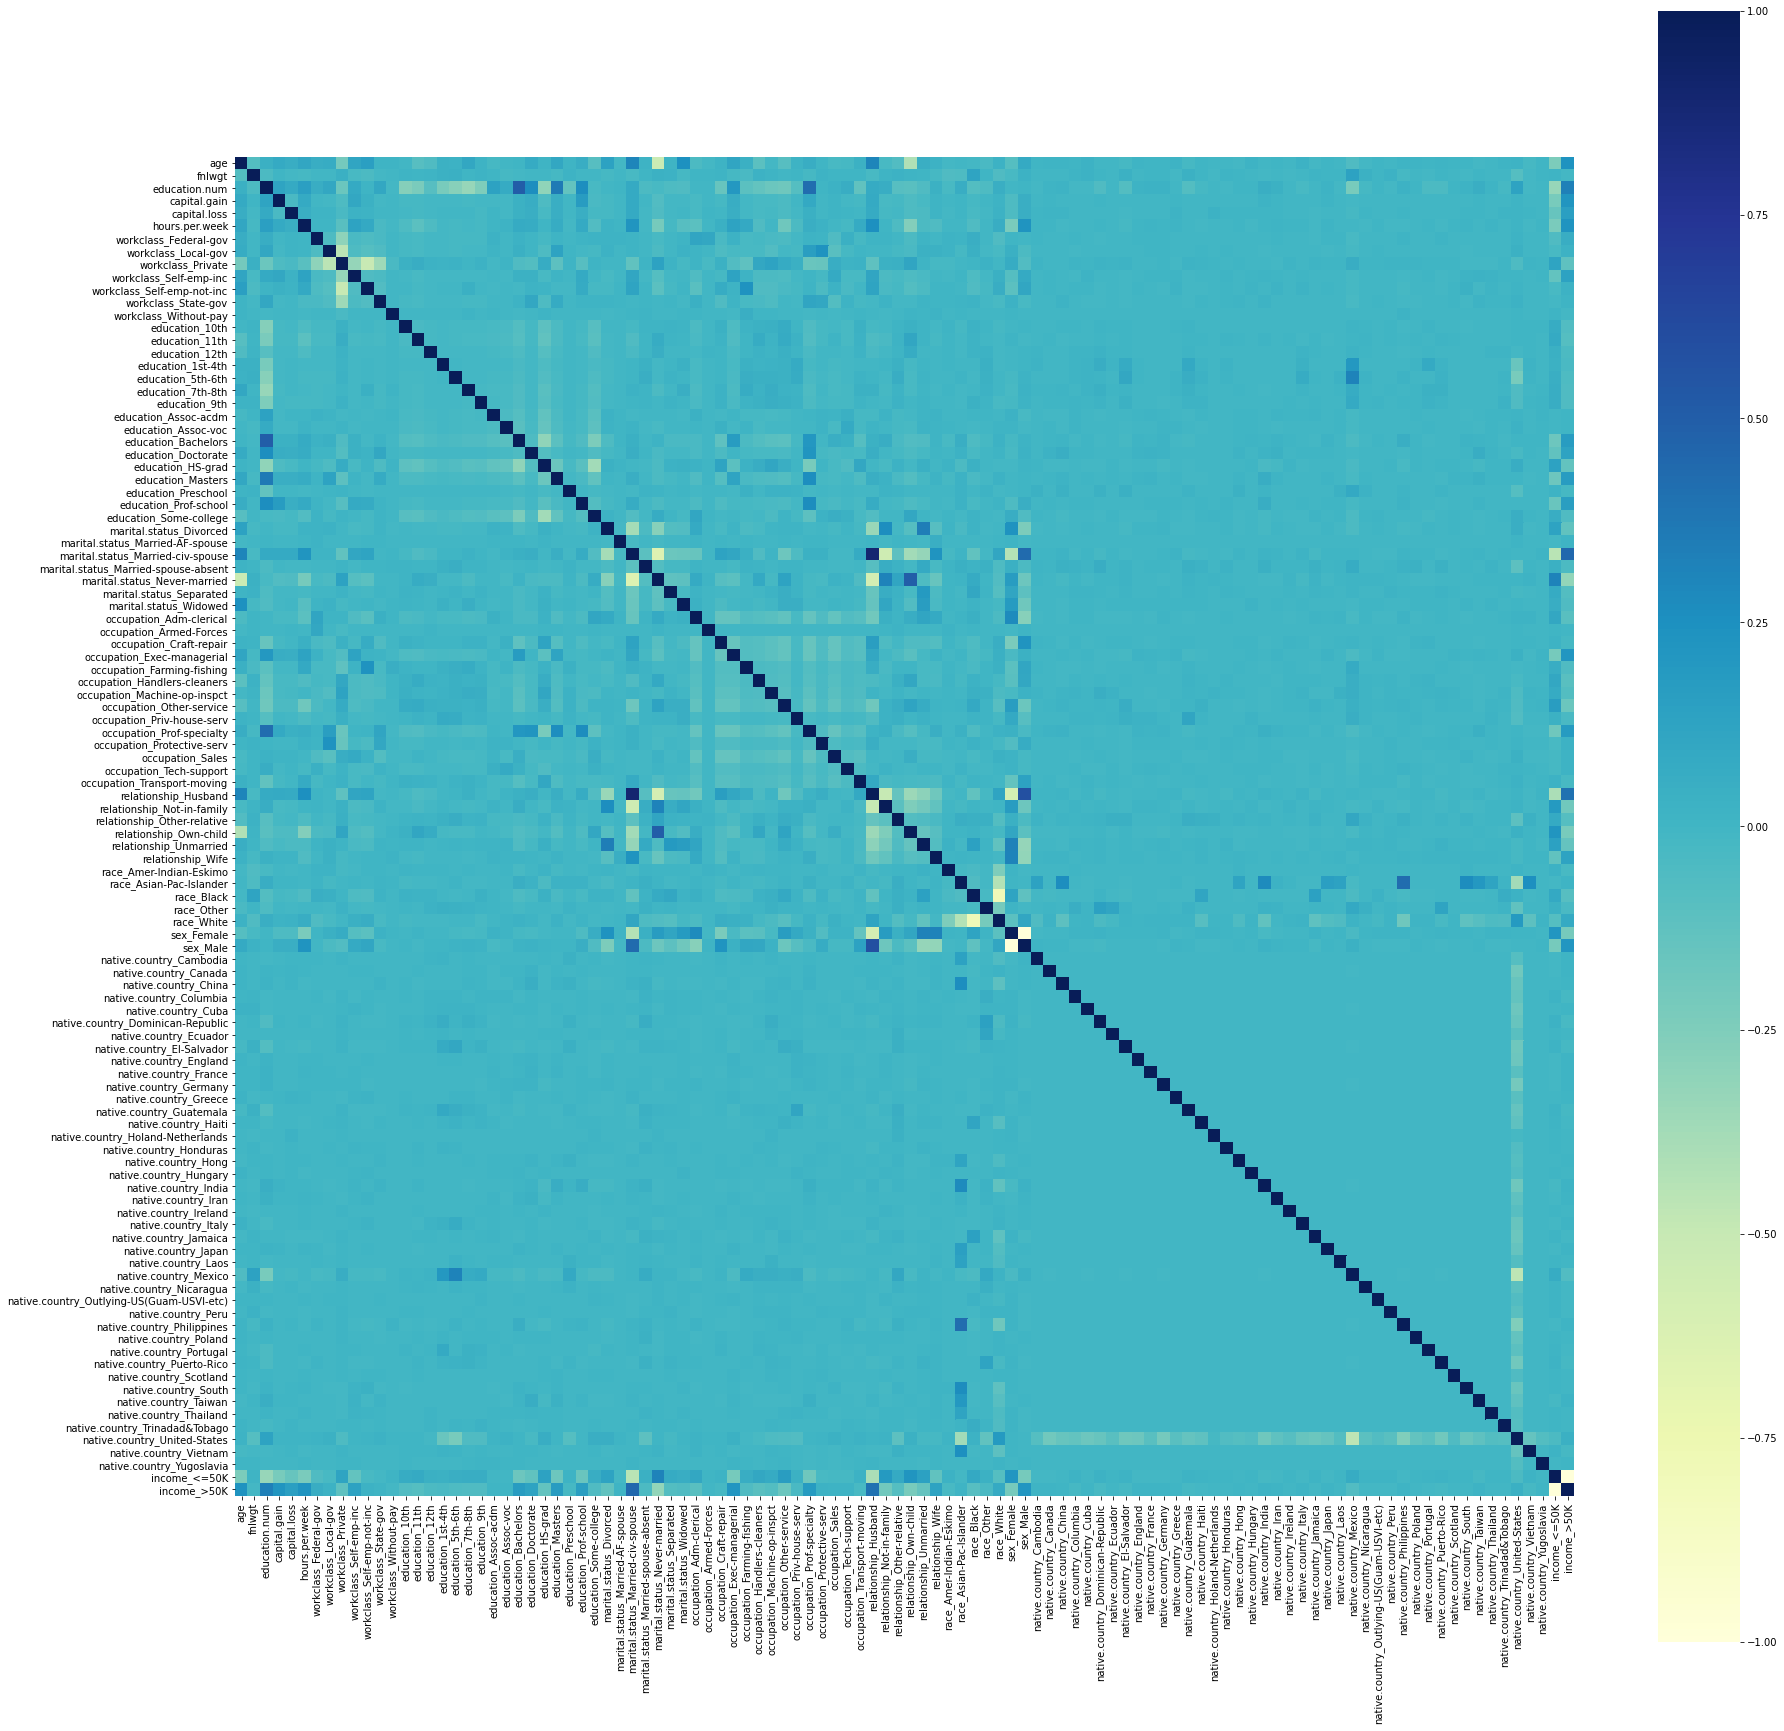

In [ ]:
#code for correlation plot
plt.figure(figsize=(30,30))
#library to establish correlation
import seaborn as sns
names = []
#creating a correlation matrix
correlations = df_no_unknown.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#hard to see

In [ ]:
#corr sorting
df_no_unknown.corr()['income_>50K'].sort_values(ascending=False)

income_>50K                          1.00
marital.status_Married-civ-spouse    0.45
relationship_Husband                 0.40
education.num                        0.34
age                                  0.24
                                     ... 
relationship_Not-in-family          -0.19
sex_Female                          -0.22
relationship_Own-child              -0.23
marital.status_Never-married        -0.32
income_<=50K                        -1.00
Name: income_>50K, Length: 106, dtype: float64

# Train a model

In [ ]:
#define x and y
y=df_no_unknown['income_>50K']
x=df_no_unknown.drop(['income_>50K','income_<=50K'],axis='columns')
x.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Holand-Netherlands,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y.head()

1    0
3    0
4    0
5    0
6    0
Name: income_>50K, dtype: uint8

In [ ]:
#split data (train/test)

from sklearn.model_selection import train_test_split
#testing data size is of 20% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.2, random_state =5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
logmodel = LogisticRegression()  
logmodel.fit(x_train,y_train)
logpred = logmodel.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#compare actual vs predict

pd.DataFrame({"Actual": y_test, "Predict": logpred}).head()

,Actual,Predict
11580,0,0
5777,0,0
23467,0,0
23366,0,0
1565,1,1


# Evauation

In [ ]:
print(confusion_matrix(y_test, logpred))

[[4363  144]
 [1100  426]]


In [ ]:
print(accuracy_score(y_test, logpred))

0.7938007624730649


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logpred, digits=4))

              precision    recall  f1-score   support

           0     0.7986    0.9680    0.8752      4507
           1     0.7474    0.2792    0.4065      1526

    accuracy                         0.7938      6033
   macro avg     0.7730    0.6236    0.6409      6033
weighted avg     0.7857    0.7938    0.7567      6033



In [ ]:
#acc = 0.79 (quite good !)

# Logistic regression parameters

In [ ]:
logmodel.coef_

array([[ 4.18241630e-03, -3.28929944e-06, -3.64452420e-03,
         3.26897181e-04,  7.74446967e-04, -1.88763778e-02,
         5.62714255e-04,  1.91983199e-04, -7.25398254e-03,
         1.33079857e-03, -1.50218604e-04, -7.35889656e-05,
        -2.38340894e-05, -8.50996888e-04, -1.24340002e-03,
        -4.20341189e-04, -1.57163912e-04, -3.17428922e-04,
        -5.90400977e-04, -4.58342254e-04, -9.84424312e-05,
        -1.23487827e-04,  3.27012163e-03,  8.02191927e-04,
        -5.35073479e-03,  2.04814587e-03, -6.99712783e-05,
         9.50450633e-04, -2.80632774e-03, -3.85668212e-03,
         1.90167199e-05,  1.26118542e-02, -3.76475990e-04,
        -1.20453171e-02, -1.00958133e-03, -7.58942532e-04,
        -2.64075335e-03, -8.88296402e-06, -1.00324718e-03,
         3.92651295e-03, -8.49955447e-04, -1.46969565e-03,
        -1.48736481e-03, -4.00696039e-03, -1.92287198e-04,
         2.91989060e-03,  2.62235360e-04, -4.29788115e-04,
         7.55302288e-05, -5.11362212e-04,  1.13582919e-0

In [ ]:
logmodel.intercept_

array([-0.00541613])